<a href="https://colab.research.google.com/github/tirthamutha/repository/blob/main/TimeSeries_final_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Final

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

In [ ]:
data=pd.read_csv(r"C:\Users\Downloads\DailyDelhiClimateTrain.csv");data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
testdata=pd.read_csv(r"C:\Users\Downloads\DailyDelhiClimateTest.csv")

In [ ]:
testdata

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [ ]:
#CONVERTING DATE TO DATE TIME OBJECT

data['data']=pd.to_datetime(data['date'],format='%Y-%m')

In [ ]:
#CONVERTING DATE TO DATE TIME OBJECT

testdata['testdata']=pd.to_datetime(testdata['date'],format='%Y-%m')

<Axes: xlabel='date', ylabel='meantemp'>

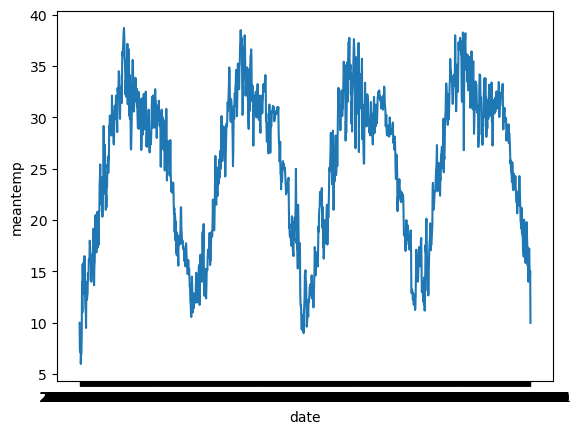

In [ ]:
sns.lineplot(x='date',y='meantemp',data=data)

In [ ]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

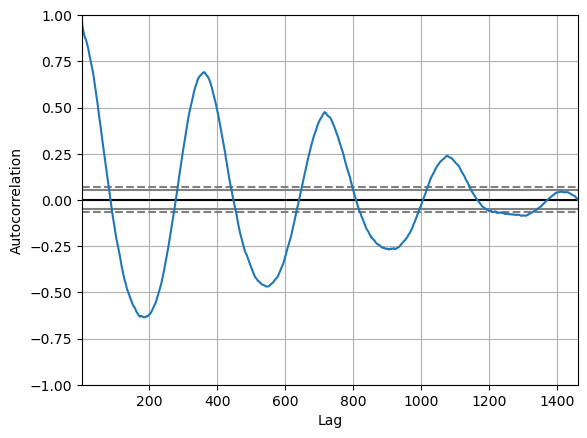

In [ ]:
autocorrelation_plot(data['meantemp'])

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

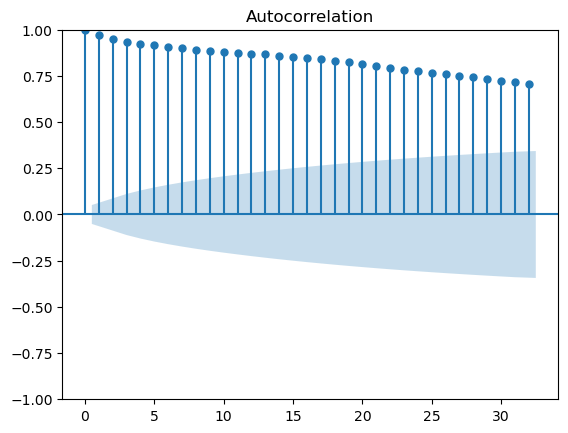

In [ ]:
plot_acf(data['meantemp'])
plt.show()

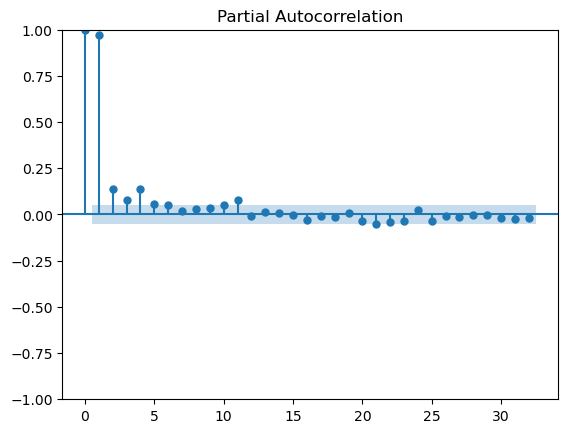

In [ ]:
plot_pacf(data['meantemp'])
plt.show()

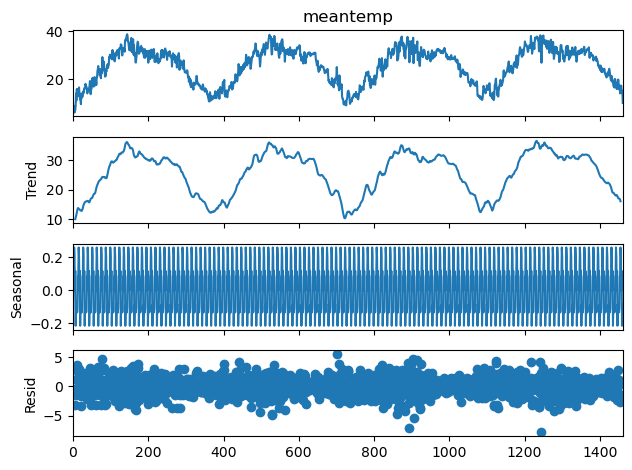

In [ ]:
decomposition=seasonal_decompose(data['meantemp'],model='additive',period=12)
decomposition.plot()
plt.show()

In [ ]:
dftest = adfuller(data.meantemp, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.021069055920671
2. P-Value :  0.2774121372301611
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1451
5. Critical Values :
	 1% :  -3.4348647527922824
	 5% :  -2.863533960720434
	 10% :  -2.567831568508802


In [ ]:
data_diff=data['meantemp'].diff(periods=350)

In [ ]:
dftest = adfuller(data_diff.dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -4.005773944880608
2. P-Value :  0.001380577137932643
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1091
5. Critical Values :
	 1% :  -3.436358022565693
	 5% :  -2.8641928088747743
	 10% :  -2.5681824424400626


In [ ]:
import pmdarima as pmd

In [ ]:
model=pmd.auto_arima(data['meantemp'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=5543.944, Time=2.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5650.181, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5615.079, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5602.960, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5648.181, Time=0.06 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=5544.946, Time=1.14 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=5544.887, Time=0.78 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=5545.718, Time=6.10 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=5545.695, Time=5.42 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5544.460, Time=0.55 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5546.490, Time=2.67 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=5546.296, Time=2.19 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=5547.925, Time=4.28 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5604.958, Time=0.43 sec
 ARIMA(1,1,0)(1,0,1

In [ ]:
sarima=SARIMAX(data['meantemp'],order=(1,1,1),seasonal_order=(1,0,1,12))
predicted=sarima.fit().predict();predicted

0        0.000000
1        9.999995
2        7.841684
3        7.555284
4        8.665322
          ...    
1457    16.702556
1458    17.159179
1459    15.521542
1460    14.752933
1461    15.341090
Name: predicted_mean, Length: 1462, dtype: float64

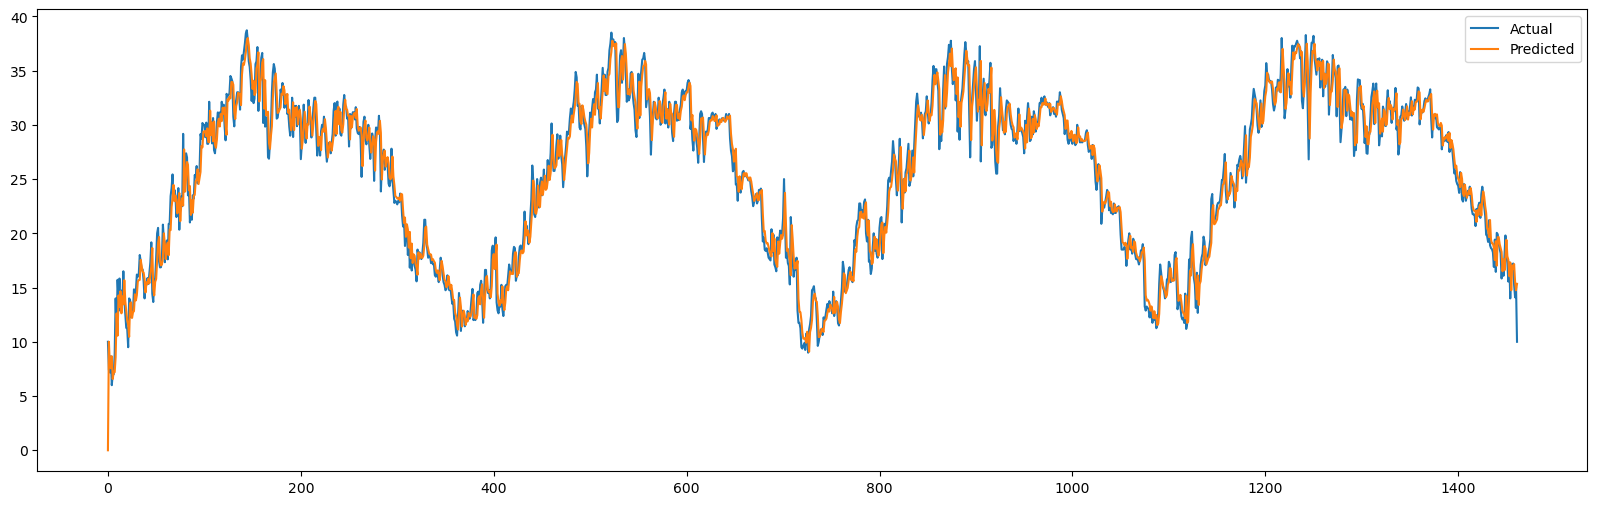

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(data['meantemp'],label='Actual')
plt.plot(predicted,label='Predicted')
plt.legend()

In [ ]:
resid=data['meantemp']-predicted;resid
mae=abs(resid.mean());mae

0.010061720732724789

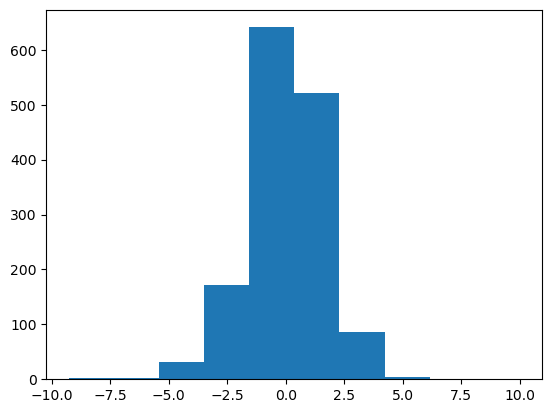

In [ ]:
plt.hist(resid)
plt.show()
#residuals follow Normal distribution

In [ ]:
(resid**2).mean() #mse

2.6489140508416034

In [ ]:
sarima1=SARIMAX(testdata['meantemp'],order=(1,1,1),seasonal_order=(1,0,1,12))
predicted1=sarima1.fit().predict();predicted1

0       0.000000
1      15.913037
2      18.158430
3      17.308265
4      18.482859
         ...    
109    33.916850
110    34.098316
111    34.096909
112    32.823739
113    32.814087
Name: predicted_mean, Length: 114, dtype: float64

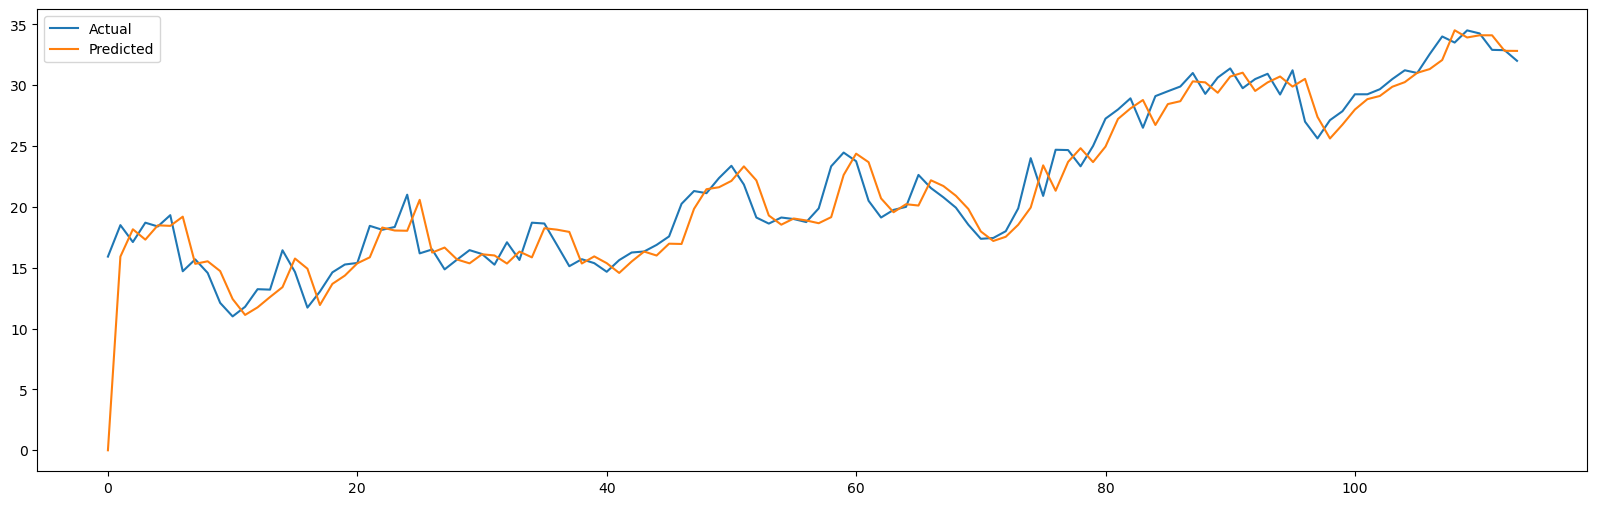

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(testdata['meantemp'],label='Actual')
plt.plot(predicted1,label='Predicted')
plt.legend()

In [ ]:
resid1=testdata['meantemp']-predicted1;resid1
mae1=abs(resid1.mean());mae1

0.32643632552815843

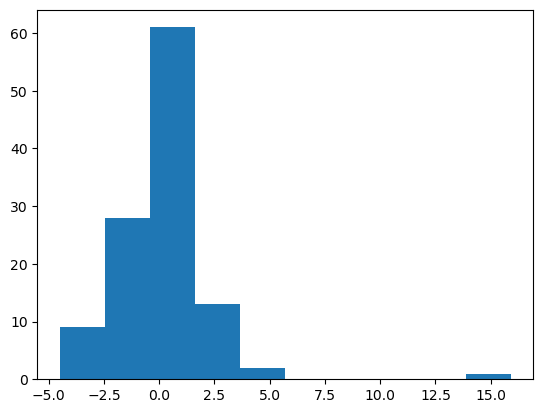

In [ ]:
plt.hist(resid1)
plt.show()

In [ ]:
import scipy.stats

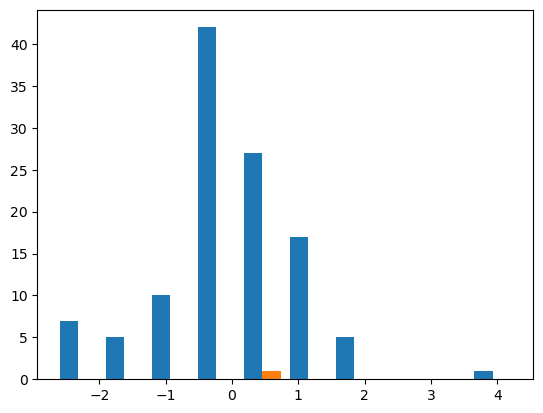

In [ ]:
resid11=scipy.stats.boxcox(abs(resid1))
plt.hist(resid11)
plt.show()

In [ ]:
(resid1**2).mean() #mse

4.924989810529808

In [ ]:
model=pmd.auto_arima(data['meantemp'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=5543.944, Time=6.06 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5650.181, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5615.079, Time=0.85 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5602.960, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5648.181, Time=0.12 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=5544.946, Time=2.58 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=5544.887, Time=2.01 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=5545.718, Time=15.39 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=5545.695, Time=14.28 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5544.460, Time=1.54 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5546.490, Time=6.97 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=5546.296, Time=5.24 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=5547.925, Time=11.18 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5604.958, Time=1.09 sec
 ARIMA(1,1,0)(1,

In [ ]:
pred=model.predict(n_periods=12);pred

1462    11.371950
1463    12.023468
1464    12.501903
1465    12.813929
1466    12.819659
1467    13.017047
1468    13.051292
1469    13.006450
1470    12.992612
1471    12.898071
1472    13.019200
1473    12.844797
dtype: float64

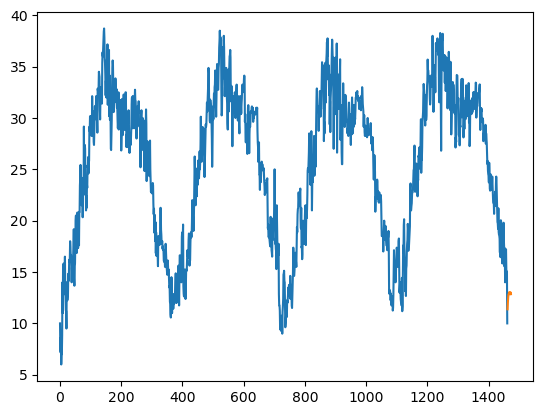

In [ ]:
plt.plot(data['meantemp'])
plt.plot(pred)

In [ ]:
model.fit(testdata['meantemp'])
pred1=model.predict(n_periods=12);pred1

114    32.023552
115    31.877191
116    31.727048
117    31.758087
118    31.500114
119    31.197101
120    31.367341
121    31.206868
122    31.222424
123    31.457863
124    31.437981
125    31.598109
dtype: float64

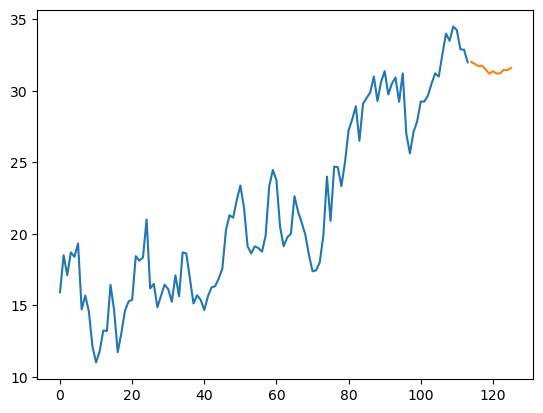

In [ ]:
plt.plot(testdata['meantemp'])
plt.plot(pred1)

In [ ]:
type(predicted)

pandas.core.series.Series

In [ ]:
temp=pd.Series(data['meantemp']);temp

0       10.000000
1        7.400000
2        7.166667
3        8.666667
4        6.000000
          ...    
1457    17.217391
1458    15.238095
1459    14.095238
1460    15.052632
1461    10.000000
Name: meantemp, Length: 1462, dtype: float64

In [ ]:
type(temp)

pandas.core.series.Series

In [ ]:
temp1=pd.concat([predicted,pred]);temp1

0        0.000000
1        9.999995
2        7.841684
3        7.555284
4        8.665322
          ...    
1469    13.006450
1470    12.992612
1471    12.898071
1472    13.019200
1473    12.844797
Length: 1474, dtype: float64

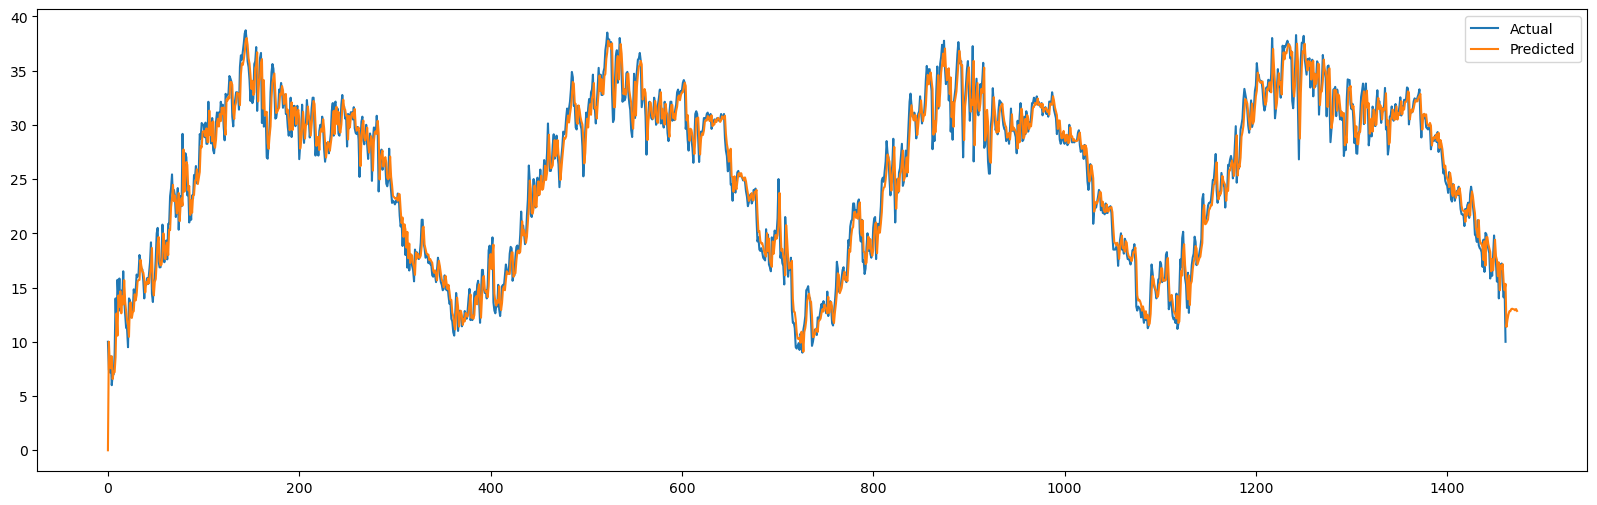

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(temp,label='Actual')
plt.plot(temp1,label='Predicted')
plt.legend()

In [ ]:
newtemp=testdata['meantemp']
newertemp=pd.concat([predicted1,pred1]);newertemp

0       0.000000
1      15.913037
2      18.158430
3      17.308265
4      18.482859
         ...    
121    31.206868
122    31.222424
123    31.457863
124    31.437981
125    31.598109
Length: 126, dtype: float64

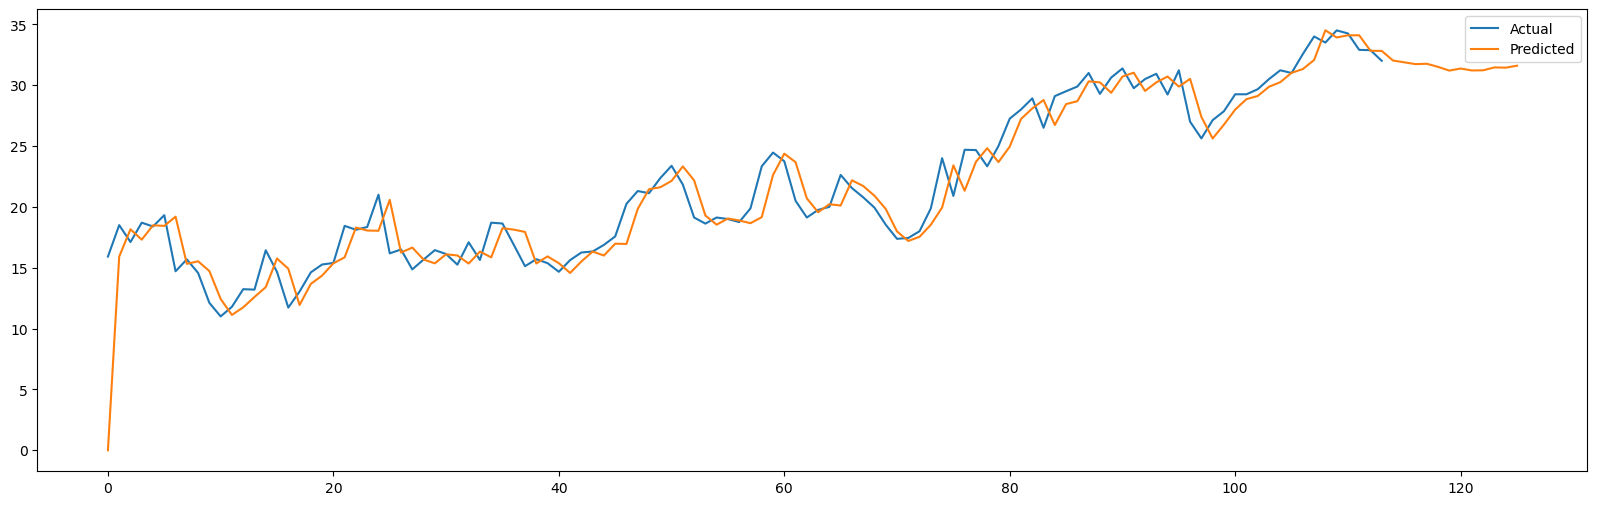

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(testdata['meantemp'],label='Actual')
plt.plot(newertemp,label='Predicted')
plt.legend()